In [18]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import string
%matplotlib inline

# Load Script and Parse out words

In [15]:
script_file = 'data/JurassicPark-Final.txt'

In [25]:
word_list = []
with open(script_file,'r') as f:
    lines = f.readlines()
    for line in lines:
#         print(line)
        words = line.split()
        for word in words:
            exclude = set(string.punctuation)
            stripped_word = ''.join(ch for ch in word if ch not in exclude)
            if stripped_word != "":
                word_list.append(stripped_word)

In [27]:
text = " ".join(word for word in word_list)

# Now generate the word cloud

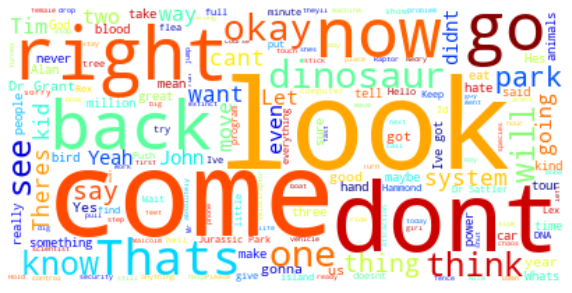

In [32]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["youre", "Theyre", "Ill", "well","Im"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords, background_color="white", colormap='jet').generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Lets add the logo constraint

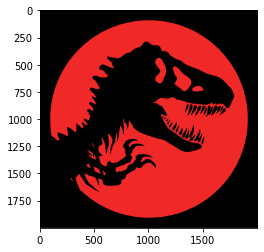

In [288]:
logo_mask = np.array(Image.open("img/logo_large.png"))
# transformed_mask = (logo_mask ==0).astype('int')*255
mask = logo_mask
from scipy.ndimage import gaussian_gradient_magnitude

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(mask[:, :, i] / 255., 2) for i in range(3)], axis=0)
mask[edges > 0.08] = 255

plt.imshow(mask)
plt.show()


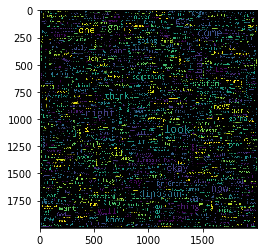

In [292]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["youre", "Theyre", "Ill", "well","Im","Thats", "Id","Dont", "Theres","Ive",
                 "Didnt","Hes"])

# Create a word cloud image
wc = WordCloud(stopwords = stopwords,max_words=5000, mask=mask, max_font_size=100,
               relative_scaling=0.5)

# Generate a wordcloud
wc.generate(text)
plt.imshow(wc)

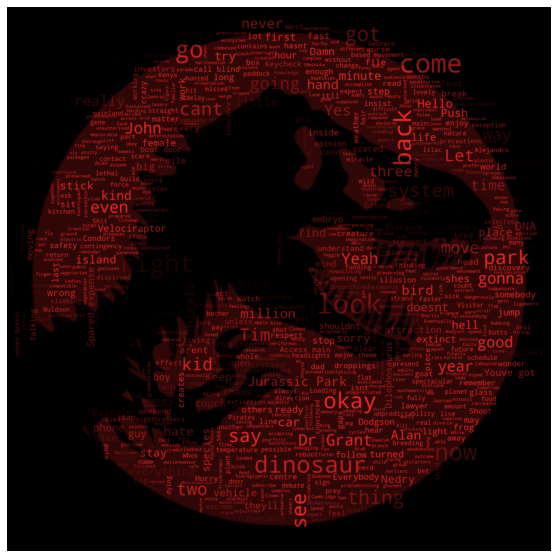

In [294]:
# print(wc.words_)

#create coloring from image
image_colors = ImageColorGenerator(mask)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
# logo_mask = np.array(Image.open("img/logo2.png"))

image = Image.open('img/logo_large.png')
arr = np.asarray(image)

plt.imshow(image, alpha=0.2)
plt.axis("off")
wc.to_file("img/word_cloud_jurassic.png")
plt.savefig("img/word_cloud_jurassic2.png", bbox_inches = 'tight')